In [ ]:
import tensorflow as tf
from PIL import Image,ImageFile
import numpy as np
import os
import time
from IPython.display import display
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
from PIL import Image,ImageFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices("GPU")
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from numpy.random import seed
seed(1337)
import datetime
import time
#from tensorflow import set_random_seed
#set_random_seed(42)
tensorflow.random.set_seed(42)
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
#from keras.optimizers import Adam
from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications.mobilenet_v3 import mobileNetV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import layers, models, Model, optimizers
print("All libraries are imported")

Mounted at /content/drive
All libraries are imported


In [ ]:
# Load the model from file
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DR-APTOS/model2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model2.tflite", "wb").write(tflite_model)

12888912

In [ ]:
interpreter = tf.lite.Interpreter(model_path="model2.tflite")
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

THE X_Aptos_19_1_545df1bbcd61.jpg has no diabetic retinopathy
Level of DR: Mild DR
ACTUAL: 0
PREDICTION: 0.0


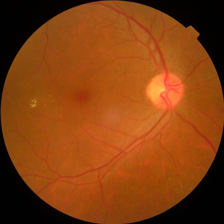

THE X_Aptos_19_1_49c5e7f6b8d2.jpg has no diabetic retinopathy
Level of DR: Mild DR
ACTUAL: 0
PREDICTION: 0.0


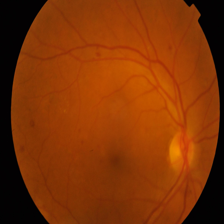

THE X_Aptos_19_1_22a6da005395.jpg has no diabetic retinopathy
Level of DR: Mild DR
ACTUAL: 0
PREDICTION: 0.0


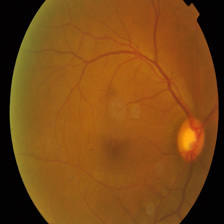

THE Y_Aptos_19_4_518e880613de.jpg has diabetic retinopathy
Level of DR: Proliferative DR
ACTUAL: 1
PREDICTION: 1.0


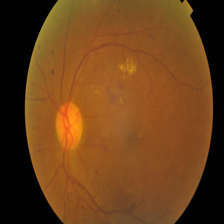

In [ ]:
# Set the path to the test images directory
test_dir="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/test/test_merge"

#FOR MULTICLASS CLASSIFICATION
l={'2':'Moderate DR','3':'Severe DR','4':'Proliferative DR'}
m={'0':'No DR ','1':'Mild DR'}
#l=['2','3','4']#FOR DR
#m=['0','1']#FOR NO DR

# Define the GPIO pins for the LEDs
#red_led_pin = GPIO.get_gpio_pin(0)
#green_led_pin = GPIO.get_gpio_pin(1)

# Initialize the GPIO pins
#red_led = GPIO(red_led_pin, 'out')
#green_led = GPIO(green_led_pin, 'out')

# Assume that the binary classification model outputs 0 or 1
classification_result = 0

a=1 #(DR CLASS)
b=0 #(NO DR CLASS)
#fig = plt.figure(figsize=(30, 6))

train_imgs= os.listdir(test_dir)
# Loop through the test images directory
for idx,img in enumerate(np.random.choice(train_imgs,4)):
# for filename in os.listdir(test_dir):
    img_dir = train_imgs
    filename = img
    
    # Load the test image
    #img_path = os.path.join(test_dir, filename)
    img_path = test_dir +'/'+ filename
    img = Image.open(img_path)
    resized_img1 = img.resize((224, 224))  # resize to (224, 224)
    input_shape = input_details[0]['shape']
    
    input_tensor= np.array(np.expand_dims(resized_img1,0), dtype=np.float32)
    input_index = interpreter.get_input_details()[0]["index"]
    interpreter.set_tensor(input_index, input_tensor)
    #Run the inference
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    #output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    top_k = results.argsort()

    
    
    if 'Rdr' in img_path:
        #if results==1.0 and classification_result == 1:
        if results==1:
              img2 = Image.open(img_path)
              resized_img1 = img2.resize((224, 224))  # resize to (224, 224)
              actual=filename[9]
              print('The'+' '+filename+' '+'has diabetic retinopathy')
              if actual in l:
                 dia=1
                 level=actual
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
              print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL
              resized_img1.show()
              #TO BLINK LIGHTS ON PYNQ BOARD FOR DR
              #red_led.write(0)  # turn off the red LED
              #green_led.write(1)  # turn on the green LED

        elif results==0:
              results=1
              print('THE'+' ' +filename+' '+'has diabetic retinopathy')
              img3 = Image.open(img_path)
              resized_img1 = img3.resize((224, 224))  # resize to (224, 224)
              actual=filename[9]
              if actual in l:
                 dia=1
                 level=actual
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
              print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL
              resized_img1.show()
              #TO BLINK LIGHTS ON PYNQ BOARD FOR DR
              #red_led.write(0)  # turn off the red LED
              #green_led.write(1)  # turn on the green LED

    elif 'Nrdr' in test_dir:
          if results==0:
               print('THE'+' ' +filename+' '+'has no diabetic retinopathy')
               img4 = Image.open(img_path)
               resized_img1 = img4.resize((224, 224))  # resize to (224, 224)
               actual=filename[9]
               if actual in m:
                 dia=0
                 level=actual
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
               print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL
               resized_img1.show()
               #TO BLINK LIGHTS ON PYNQ BOARD FOR NO DR
               # red_led.write(1)  # turn on the red LED
               # green_led.write(0)  # turn off the green LED

          elif results==1:
               results=0
               print('THE'+' ' +filename+' '+'has no diabetic retinopathy')
               img5 = Image.open(img_path)
               resized_img1 = img5.resize((224, 224))  # resize to (224, 224)
               actual=filename[9]
               if actual in m:
                 dia=0
                 level=actual
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
               print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL
               resized_img1.show()
               #TO BLINK LIGHTS ON PYNQ BOARD FOR NO DR
               # red_led.write(1)  # turn on the red LED
               # green_led.write(0)  # turn off the green LED

    elif 'test_merge' in test_dir:
          if 'X'==filename[0]:
              print('THE'+' ' +filename+' '+'has no diabetic retinopathy')
              img6 = Image.open(img_path)
              resized_img1 = img6.resize((224, 224))  # resize to (224, 224)
              actual=filename[11]
              if actual in m:
                 dia=0
                 level=m[actual]
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
              if results==0:
                 print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL

              elif results==1:
                 results=0
                 print('PREDICTION:',results)
              
              resized_img1.show()
              #TO BLINK LIGHTS ON PYNQ BOARD FOR NO DR
              #red_led.write(0)  # turn off the red LED
              #green_led.write(1)  # turn on the green LED

          elif 'Y'==filename[0]:#FOR DR
              print('THE'+' ' +filename+' '+'has diabetic retinopathy')
              img8 = Image.open(img_path)
              resized_img1 = img8.resize((224, 224))  # resize to (224, 224)
              actual=filename[11]
              if actual in l:
                 dia=1
                 level=l[actual]
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE

              if results==1:
                 print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL

              elif results==0:
                 results=1
                 print('PREDICTION:',results)
              resized_img1.show()
              #TO BLINK LIGHTS ON PYNQ BOARD FOR DR
               # red_led.write(1)  # turn on the red LED
               # green_led.write(0)  # turn off the green LED

      
    else: #IF IMAGE IS GIVEN FROM ANY OTHER DIRECTORY
         if results==1:
              img2 = Image.open(img_path)
              resized_img1 = img2.resize((224, 224))  # resize to (224, 224)
              actual=filename[9]
              print('The'+' '+filename+' '+'has diabetic retinopathy')
              if actual in l:
                 dia=1
                 level=actual
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
              print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL
              resized_img1.show()
              #TO BLINK LIGHTS ON PYNQ BOARD FOR DR
              #red_led.write(0)  # turn off the red LED
              #green_led.write(1)  # turn on the green LED

         elif results==0:
               print('THE'+' ' +filename+' '+'has no diabetic retinopathy')
               img4 = Image.open(img_path)
               resized_img1 = img4.resize((224, 224))  # resize to (224, 224)
               actual=filename[9]
               if actual in m:
                 dia=0
                 level=actual
                 print('Level of DR:',level)#SHOW LEVEL OF DR
                 print('ACTUAL:',dia)#SHOW CORRECT OUTPUT OF IMAGE
               print('PREDICTION:',results)#SHOW RESULT PREDICTED BY MODEL
               resized_img1.show()
               #TO BLINK LIGHTS ON PYNQ BOARD FOR NO DR
               # red_led.write(1)  # turn on the red LED
               # green_led.write(0)  # turn off the green LED


In [ ]:
# Set the path to the test images directory
test_dir="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"

#FOR MULTICLASS CLASSIFICATION
l=['2','3','4']#FOR DR
m=['0','1']#FOR NO DR

# Define the GPIO pins for the LEDs
#red_led_pin = GPIO.get_gpio_pin(0)
#green_led_pin = GPIO.get_gpio_pin(1)

# Initialize the GPIO pins
#red_led = GPIO(red_led_pin, 'out')
#green_led = GPIO(green_led_pin, 'out')

# Assume that the binary classification model outputs 0 or 1
classification_result = 0

a=1 #(DR CLASS)
b=0 #(NO DR CLASS)
#fig = plt.figure(figsize=(30, 6))

train_imgs= os.listdir(test_dir)
# Loop through the test images directory
for idx,img in enumerate(np.random.choice(train_imgs,2)):
# for filename in os.listdir(test_dir):
    img_dir = train_imgs
    filename = img
    
    # Load the test image
    #img_path = os.path.join(test_dir, filename)
    img_path = test_dir +'/'+ filename
    img = Image.open(img_path)
    resized_img1 = img.resize((224, 224))  # resize to (224, 224)
    input_shape = input_details[0]['shape']
    
    input_tensor= np.array(np.expand_dims(resized_img1,0), dtype=np.float32)
    input_index = interpreter.get_input_details()[0]["index"]
    interpreter.set_tensor(input_index, input_tensor)
    #Run the inference
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    #output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    top_k = results.argsort()


In [ ]:
test_dir="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/train/Rdr"

# Load the trained model

from tensorflow.keras.models import load_model

# Load the model from file
model1 ="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/model.h5"
model = keras.models.load_model(model1)

train_imgs= os.listdir(test_dir)

# Loop through the test images directory
for filename in os.listdir(test_dir):
    img_dir = train_imgs
    filename = img
    img_path = test_dir +'/'+ filename
      # img_path = os.path.join(test_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    input_shape = input_details[0]['shape']
    
    input_tensor= np.array(np.expand_dims(resized_img1,0), dtype=np.float32)
    input_index = interpreter.get_input_details()[0]["index"]
    interpreter.set_tensor(input_index, input_tensor)
    #Run the inference
    interpreter.invoke()
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    #output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    top_k = results.argsort()
    print('THE'+' '+filename+' '+'has predictions',results)


In [ ]:
#DEPLOYMENT OF AI MODEL USING GRADIO

In [ ]:
import tensorflow as tf
import cv2

model1 ="/content/drive/MyDrive/Colab Notebooks/DR-APTOS/model.h5"
model = keras.models.load_model(model1)
a=1
b=0
def classify_image(img):
        img = cv2.resize(img, (224, 224))
        img = img.reshape(1, 224, 224, 3)
        prediction = model.predict(img)
        integer_prediction = int(np.round(prediction, 0))
        labels=['DIABETIC EYE','NON-DIABETIC EYE']

        if integer_prediction==a:
              label= labels[0]
              prediction1= integer_prediction
              return [label,prediction1]

        elif integer_prediction==b:
             label1= labels[1]
             prediction2= integer_prediction
             return [label1,prediction2]

import gradio as gr

output1= gr.outputs.Textbox(label='EYE DIAGNOSIS')
output2=  gr.outputs.Textbox(label='PREDICTION')

face=gr.Interface(fn=classify_image, 
             inputs= gr.Image(shape=(224, 224)),
             outputs= [output1,output2],
             examples=["/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Nrdr/Aptos_19_0_3580a545016d.jpg", "/content/drive/MyDrive/Colab Notebooks/DR-APTOS/valid/Nrdr/Aptos_19_0_4f5dd7660b17.jpg"]).launch()

/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 